In [5]:
import matplotlib.pyplot as plt
import sympy as sp
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
from sympy.parsing.sympy_parser import parse_expr

# 0) Setup
mpl.rcParams['text.usetex'] = False
plt.style.use('seaborn-v0_8-whitegrid')

In [6]:
pow2 = lambda x: x ** 2
pow3 = lambda x: x ** 3
pow4 = lambda x: x ** 4
pow5 = lambda x: x ** 5

# Dijet Results (2025 12 06) Latest

In [7]:
raw_equations = [
    '2.090535006288719',
    'exp(0.7374616095597221)',
    '0.8414644345688691 / x1',
    'pow3(0.9440285301708932) / x1',
    '2.840959135159774 / (x2 + x1)',
    'x2 / pow3(x1 + x2)',
    'exp((x1 + x2) / -0.05459454825770353) / 0.0028244764711741585',
    '0.034146235305494675 / ((pow3(x1) + pow3(x2)) + 0.00017986124388753264)',
    'exp(((0.7085044694804051 * x2) + x1) / -0.04486907643689514) / 0.0025534302366485035',
    '0.025243124435902566 / ((0.00013209544393223165 + pow3(-0.015526904559981592 + x2)) + pow3(x1))',
    '0.06021343996074825 / ((pow3(x2) + 0.00032443090344524473) * exp(pow2(x1) / 0.005263042819159475))',
    '0.654012936959842 / (0.0034996534947936537 * exp((pow2(x1) / 0.005315022686226753) + pow2(x2 / 0.08408622440214643)))',
    '(0.07262867756736505 - pow2(x2)) / (exp(pow2(x1) / 0.005263463317900096) * (0.0003928453113340877 + pow3(x2)))',
    '0.08408622440214643 / (exp((pow2(x1) / 0.005263042819159475) + pow2(x2 / -0.194019234670927)) * (pow3(x2) + 0.0004543466750722736))',
    '0.06376428404735136 / ((pow2(pow3(x2 / 0.16150960469721556)) + exp(pow2(x1) / 0.0052488969485840475)) * (pow3(x2) + 0.00034517857235624066))',
    '0.07419219887331074 / ((0.0004561132944133364 + pow3(x2)) * (exp((pow2(x1) / 0.005617224857471601) + pow2(x2 / 0.200964734238503)) + -0.1361224547445641))',
    '0.07203701351284848 / ((pow3(x2) + 0.00046087651498753323) * (pow3(-0.5566378221507172) + exp(pow2(x2 / -0.2013624629509566) + (pow2(x1) / 0.005751034162213533))))',
    '0.06367971666681055 + (0.07419219887331074 / ((exp((pow2(x1) / 0.005617224857471601) + pow2(x2 / 0.200964734238503)) + -0.1361224547445641) * (0.0004561132944133364 + pow3(x2))))',
    '0.05758174463092609 + (0.07203701351284848 / ((pow3(x2) + 0.00046087651498753323) * (pow3(-0.5566378221507172) + exp(pow2(x2 / 0.2006343125611199) + (pow2(x1) / 0.005751034162213533)))))',
    '(0.09001976270401611 + pow3(pow2(x1 / -0.24061571858445624))) / ((pow3(x2) + 0.000483117684768911) * exp(pow2(x2 / -0.17941983867120173) + (pow2(x1) / 0.005133235121843175)))',
    '(pow3(pow2(x1 / -0.24529100698662837)) + 0.06411247852279982) / ((pow3(x2) + 0.0003437415863096075) * (exp(pow2(x1) / 0.005067550788060732) + pow2(pow3(x2 / 0.1613856154279212))))',
    '(0.06402297176161158 + pow3(pow2((x1 / 0.16814923380619481) + -0.2741250328878744))) / ((pow3(x2) + 0.0003451298003517172) * (pow3(pow2(x2 / -0.16114400960972727)) + exp(pow2(x1) / 0.005169960005298225)))',
    '(0.06402297176161158 + pow3(pow2(-0.2741250328878744 + (x1 / exp(-1.7892018571863806))))) / ((0.0003451298003517172 + pow3(x2)) * (pow3(pow2(x2 / -0.16114400960972727)) + exp(pow2(x1) / 0.005169960005298225)))',
    '0.03984107617083789 + ((pow2(pow3(-0.2741250328878744 + (x1 / 0.16814923380619481))) + 0.06402297176161158) / ((pow3(pow2(x2 / -0.1604627025241577)) + exp(pow2(x1) / 0.005169960005298225)) * (pow3(x2) + 0.0003451298003517172)))',
    '(0.062259309425020865 / (exp(pow2(x1) / 0.0050865798262097915) * (0.0003432843044236077 + (pow3(pow2(x2 / (x2 - 0.5413048264599588))) + pow3(x2))))) + pow3(pow2((1.318898210574647 - x2) - (x1 / 0.5775031264653955)))',
]

complexity = [
    1,
    2,
    3,
    4,
    5,
    6,
    8,
    9,
    10,
    11,
    12,
    14,
    15,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    26,
    27,
    28,
    30,
]

loss = [
    139.89110216947827,
    139.8911021351579,
    97.87324488958323,
    97.87324355759247,
    76.60657299183167,
    25.594180482512616,
    7.710081871939173,
    5.4732154327994245,
    4.945557467076734,
    3.0968633917966937,
    0.2559299903074121,
    0.1507659377328147,
    0.1025598459734472,
    0.0757547282709271,
    0.0674897511083989,
    0.0615308568296317,
    0.0607259906569149,
    0.0577088946260681,
    0.057481332178869,
    0.0491529411233546,
    0.0366497351900575,
    0.0293456612114258,
    0.0292464971883751,
    0.0278094447456015,
    0.0263645732003249,
]


Original at complexity 1: 2.090535006288719
function_ready: 2.090535006288719
Processed: 2.10000000000000
LaTeX: 2.1

Original at complexity 2: exp(0.7374616095597221)
function_ready: np.exp(0.7374616095597221)
Processed: 2.10000000000000
LaTeX: 2.1

Original at complexity 3: 0.8414644345688691 / x1
function_ready: 0.8414644345688691 / x1
Processed: 0.84/x1
LaTeX: \frac{0.84}{x_{1}}

Original at complexity 4: pow3(0.9440285301708932) / x1
function_ready: pow3(0.9440285301708932) / x1
Processed: pow3(0.94)/x1
LaTeX: \frac{0.83}{x_{1}}

Original at complexity 5: 2.840959135159774 / (x2 + x1)
function_ready: 2.840959135159774 / (x2 + x1)
Processed: 2.8/(x1 + x2)
LaTeX: \frac{2.8}{x_{1} + x_{2}}

Original at complexity 6: x2 / pow3(x1 + x2)
function_ready: x2 / pow3(x1 + x2)
Processed: x2/pow3(x1 + x2)
LaTeX: \frac{x_{2}}{\left(x_{1} + x_{2}\right)^{3}}

Original at complexity 8: exp((x1 + x2) / -0.05459454825770353) / 0.0028244764711741585
function_ready: np.exp((x1 + x2) / -0.05459454825

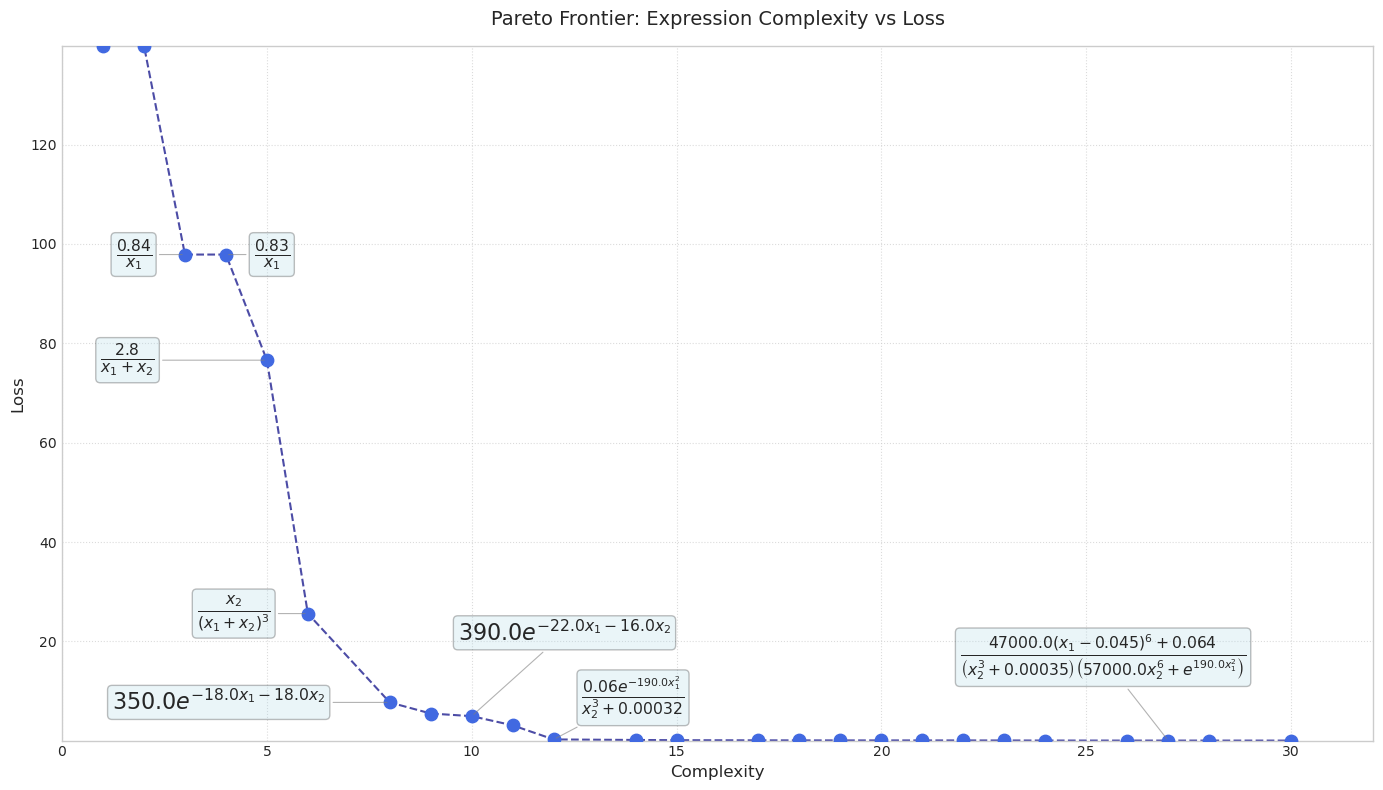

In [18]:
range_of_interest = (1, 48)
indices_of_interest = [i for i, c in enumerate(complexity) if range_of_interest[0] <= c <= range_of_interest[1]]
complexity = [complexity[i] for i in indices_of_interest]
loss = [loss[i] for i in indices_of_interest]
raw_equations = [raw_equations[i] for i in indices_of_interest]

# 2) Sympy setup
x1, x2 = sp.symbols('x1 x2')

# 3) Custom function to round constants only (not function arguments)
def round_constants(expr, ndigits=1):
    """
    Round every bare Float in `expr` so that, when printed,
    it has exactly `ndigits` digits after the decimal point
    in scientific notation (i.e. nd+1 significant figures).
    """
    def _is_leaf_float(e):
        return e.is_Float and not e.args

    def _round_sci(e):
        f = float(e)
        # format with `ndigits` places after the decimal in the mantissa:
        sci_str = f"{f:.{ndigits}e}"
        return sp.Float(sci_str)

    return expr.replace(_is_leaf_float, _round_sci)

# 4) Function to convert pow2 to squared form without evaluation
def convert_pow2(expr):
    # Find all pow2 calls
    if expr.func.__name__ == 'pow2':
        return sp.Pow(convert_pow2(expr.args[0]), 2, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow2(arg) for arg in expr.args]) if expr.args else expr

def convert_pow3(expr):
    # Find all pow3 calls
    if expr.func.__name__ == 'pow3':
        return sp.Pow(convert_pow3(expr.args[0]), 3, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow3(arg) for arg in expr.args]) if expr.args else expr

def convert_pow4(expr):
    # Find all pow4 calls
    if expr.func.__name__ == 'pow4':
        return sp.Pow(convert_pow4(expr.args[0]), 4, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow4(arg) for arg in expr.args]) if expr.args else expr

def convert_pow5(expr):
    # Find all pow5 calls
    if expr.func.__name__ == 'pow5':
        return sp.Pow(convert_pow5(expr.args[0]), 5, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow5(arg) for arg in expr.args]) if expr.args else expr

# 4) Function to convert pow_int without evaluation
def convert_pow_int(expr):
    # Find all pow_int calls
    if expr.func.__name__ == 'pow_int':
        base, exp = expr.args
        # If exp is literally an integer, convert to a Python int
        if exp.is_integer and exp.is_number:
            exp = int(exp)
        # Otherwise leave exp symbolic
        return sp.Pow(convert_pow_int(base), convert_pow_int(exp), evaluate=False)

    # Recursively descend into all other function applications
    if expr.args:
        return expr.func(*[convert_pow_int(arg) for arg in expr.args])
    else:
        return expr
    
def replace_pow_functions_recursive(expr: sp.Expr) -> sp.Expr:
    """
    Recursively replaces custom functions like powN(x) with standard power notation x**N.
    E.g. pow3(x + pow2(y)) → (x + y**2)**3
    """
    # First, apply recursively to all arguments (bottom-up),
    # so that nested pow-functions inside arguments get replaced too.
    expr = expr.xreplace({})  # no-op; just ensures expr is a Basic (not strictly needed)

    # Define replacement function
    def _repl(f):
        # check it's a function call
        if not isinstance(f, sp.Function):
            return f

        name = f.func.__name__
        if not name.startswith("pow"):
            return f

        # parse N from “powN”
        try:
            N = int(name[len("pow"):])
        except ValueError:
            return f

        if len(f.args) != 1:
            # unexpected arity, leave unchanged
            return f

        base = f.args[0]
        # Recursively transform the base
        new_base = replace_pow_functions_recursive(base)
        return new_base ** N

    # Use replace with map=False (so it returns an Expr)
    new_expr = expr.replace(
        lambda x: isinstance(x, sp.Function) and x.func.__name__.startswith("pow"),
        _repl,
        map=False
    )
    return new_expr

# 5) Build MathText labels
latex_labels = []
exprs_final = []
for id, s in enumerate(raw_equations):
    try:
        # Pre-process pow2 -> custom function
        s_processed = s.replace('pow2', 'pow2_func')
        s_processed = s.replace('pow3', 'pow3_func')
        s_processed = s.replace('pow4', 'pow4_func')
        s_processed = s.replace('pow5', 'pow5_func')
        s_processed = s_processed.replace('pow_int', 'pow_int_func')
        
        # Define custom functions
        locals_dict = {
            'x1': x1,
            'x2': x2,
            'pow2_func': sp.Function('pow2'),
            'pow3_func': sp.Function('pow3'),
            'pow4_func': sp.Function('pow4'),
            'pow5_func': sp.Function('pow5'),
            'pow_int_func': sp.Function('pow_int'),
            'asin': sp.asin,
            'atan': sp.atan,
            'tan': sp.tan,
            'exp': sp.exp,
        }
        
        # Parse while preserving structure
        expr = parse_expr(s_processed, evaluate=False, local_dict=locals_dict)
        
        # Convert pow2_func to squared form
        expr_converted_pow2 = convert_pow2(expr)
        expr_converted_pow3 = convert_pow3(expr)
        expr_converted_pow4 = convert_pow4(expr)
        expr_converted_pow5 = convert_pow5(expr)
        expr_converted = convert_pow_int(expr_converted_pow5)
        
        # Round constants (only standalone floats)
        expr_converted_int1 = round_constants(expr_converted)
        expr_converted_int2 = round_constants(expr_converted_int1)
        expr_final = round_constants(expr_converted_int2)
        # expr_final = expr_final.simplify()
        # expr_final = expr_final.expand()
        exprs_final.append(expr_final)

        # Get MathText-friendly LaTeX
        mt = replace_pow_functions_recursive(expr_final)
        expr_converted_int1 = round_constants(mt)
        expr_converted_int2 = round_constants(expr_converted_int1)
        mt = round_constants(expr_converted_int2)
        mt = sp.latex(mt)
        latex_labels.append(f"${mt}$")
        
        # Replace 'exp' with 'np.exp'
        modified_expression = s.replace('exp', 'np.exp')
    
        # Replace 'log' with 'np.log'
        modified_expression = modified_expression.replace('log', 'np.log')
        # Debug print
        print(f"Original at complexity {complexity[id]}: {s}")
        print(f"function_ready: {modified_expression}")
        print(f"Processed: {expr_final}")
        print(f"LaTeX: {mt}\n")
    except Exception as e:
        print(f"Error processing expression: {s}\n{e}")
        latex_labels.append(f"Error: {s}")

# 6) Manual offsets for clarity
offsets = [
    (0, 0), (0, 0), (-50, 0), (20, 0), (-120, 0),
    (-80, 0), (-200, 0), (0, 0), (-10, 60), (0, 0),
    (20, 30), (0, 0), (0, 0), (0, 0), (0, 0),
    (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
    (0, 0), (0, 0), (-150, 60), (0, 0), (0, 0),
]

# 7) Plot
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(complexity, loss, s=80, zorder=3, color='royalblue')
ax.plot(complexity, loss, linestyle='--', alpha=0.7, zorder=2, color='navy')

# Set axis limits
ax.set_xlim(min(complexity) - 1, max(complexity) + 2)
ax.set_ylim(min(loss) - 0.0005, max(loss))
fig.subplots_adjust(right=0.75)


skip_indices = []
keep_indices = [3-1, 4-1, 5-1, 6-1, 7-1, 9-1, 11-1, 23-1]
# Annotate with MathText labels
for i, (x, y, lbl, (dx, dy)) in enumerate(zip(complexity, loss, latex_labels, offsets)):
    if i in skip_indices or (i not in keep_indices):
        continue
    ax.annotate(
        lbl,
        xy=(x, y),
        xytext=(dx, dy),
        textcoords='offset points',
        ha='left',
        va='center',
        fontsize=16,
        bbox=dict(boxstyle='round,pad=0.2', alpha=0.25, fc='lightblue'),
        arrowprops=dict(arrowstyle='-', lw=0.8, alpha=0.6, color='gray')
    )

ax.set_title("Pareto Frontier: Expression Complexity vs Loss", fontsize=14, pad=15)
ax.set_xlabel("Complexity", fontsize=12)
ax.set_ylabel("Loss", fontsize=12)
ax.grid(True, linestyle=':', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

Original at complexity 1: 2.090535006288719
function_ready: 2.090535006288719
Processed: 2.10000000000000
LaTeX: 2.1

Original at complexity 2: exp(0.7374616095597221)
function_ready: np.exp(0.7374616095597221)
Processed: 2.10000000000000
LaTeX: 2.1

Original at complexity 3: 0.8414644345688691 / x1
function_ready: 0.8414644345688691 / x1
Processed: 0.84/x1
LaTeX: \frac{0.84}{x_{1}}

Original at complexity 4: pow3(0.9440285301708932) / x1
function_ready: pow3(0.9440285301708932) / x1
Processed: pow3(0.94)/x1
LaTeX: \frac{0.83}{x_{1}}

Original at complexity 5: 2.840959135159774 / (x2 + x1)
function_ready: 2.840959135159774 / (x2 + x1)
Processed: 2.8/(x1 + x2)
LaTeX: \frac{2.8}{x_{1} + x_{2}}

Original at complexity 6: x2 / pow3(x1 + x2)
function_ready: x2 / pow3(x1 + x2)
Processed: x2/pow3(x1 + x2)
LaTeX: \frac{x_{2}}{\left(x_{1} + x_{2}\right)^{3}}

Original at complexity 8: exp((x1 + x2) / -0.05459454825770353) / 0.0028244764711741585
function_ready: np.exp((x1 + x2) / -0.05459454825

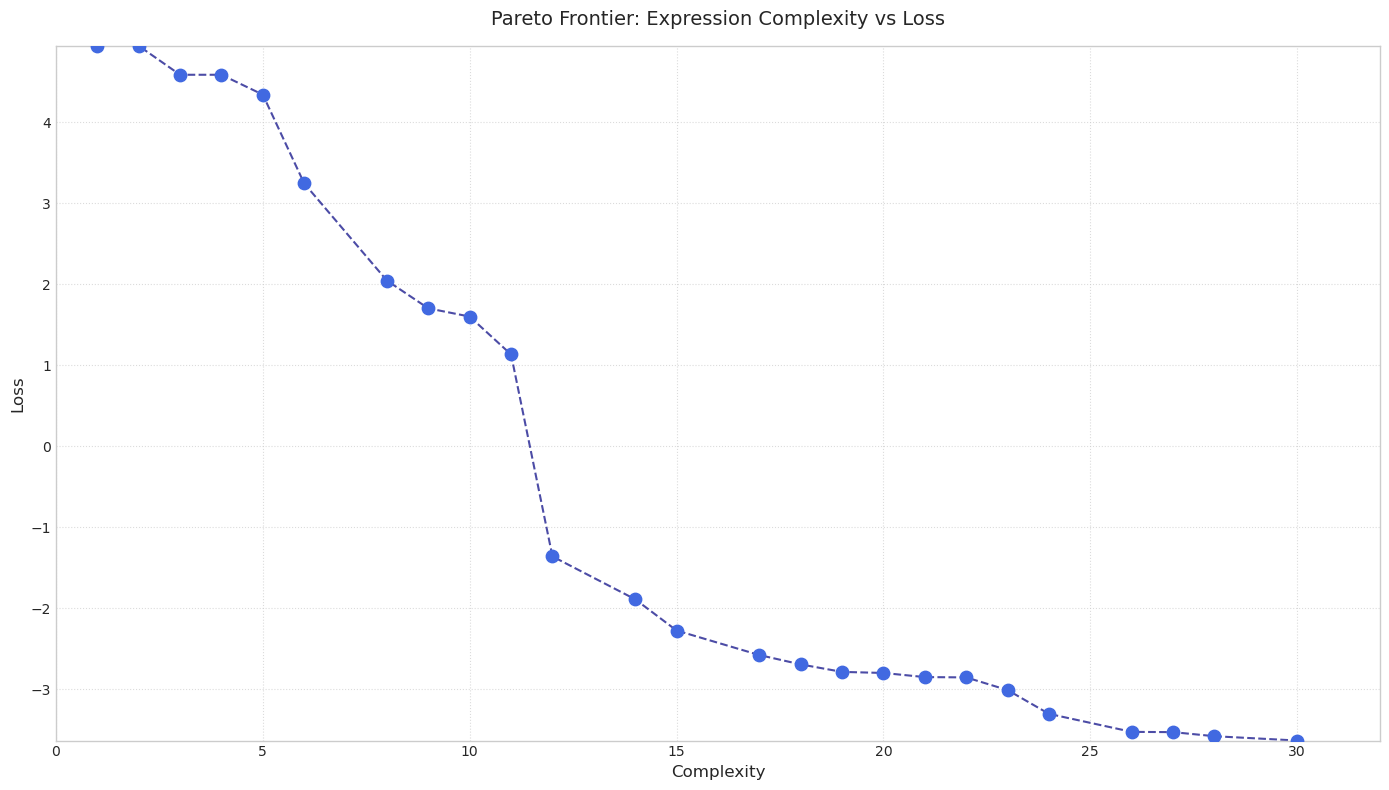

In [14]:
range_of_interest = (1, 48)
indices_of_interest = [i for i, c in enumerate(complexity) if range_of_interest[0] <= c <= range_of_interest[1]]
complexity = [complexity[i] for i in indices_of_interest]
loss = [loss[i] for i in indices_of_interest]
raw_equations = [raw_equations[i] for i in indices_of_interest]

# 2) Sympy setup
x1, x2 = sp.symbols('x1 x2')

# 3) Custom function to round constants only (not function arguments)
def round_constants(expr, ndigits=1):
    """
    Round every bare Float in `expr` so that, when printed,
    it has exactly `ndigits` digits after the decimal point
    in scientific notation (i.e. nd+1 significant figures).
    """
    def _is_leaf_float(e):
        return e.is_Float and not e.args

    def _round_sci(e):
        f = float(e)
        # format with `ndigits` places after the decimal in the mantissa:
        sci_str = f"{f:.{ndigits}e}"
        return sp.Float(sci_str)

    return expr.replace(_is_leaf_float, _round_sci)

# 4) Function to convert pow2 to squared form without evaluation
def convert_pow2(expr):
    # Find all pow2 calls
    if expr.func.__name__ == 'pow2':
        return sp.Pow(convert_pow2(expr.args[0]), 2, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow2(arg) for arg in expr.args]) if expr.args else expr

def convert_pow3(expr):
    # Find all pow3 calls
    if expr.func.__name__ == 'pow3':
        return sp.Pow(convert_pow3(expr.args[0]), 3, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow3(arg) for arg in expr.args]) if expr.args else expr

def convert_pow4(expr):
    # Find all pow4 calls
    if expr.func.__name__ == 'pow4':
        return sp.Pow(convert_pow4(expr.args[0]), 4, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow4(arg) for arg in expr.args]) if expr.args else expr

def convert_pow5(expr):
    # Find all pow5 calls
    if expr.func.__name__ == 'pow5':
        return sp.Pow(convert_pow5(expr.args[0]), 5, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow5(arg) for arg in expr.args]) if expr.args else expr

# 4) Function to convert pow_int without evaluation
def convert_pow_int(expr):
    # Find all pow_int calls
    if expr.func.__name__ == 'pow_int':
        base, exp = expr.args
        # If exp is literally an integer, convert to a Python int
        if exp.is_integer and exp.is_number:
            exp = int(exp)
        # Otherwise leave exp symbolic
        return sp.Pow(convert_pow_int(base), convert_pow_int(exp), evaluate=False)

    # Recursively descend into all other function applications
    if expr.args:
        return expr.func(*[convert_pow_int(arg) for arg in expr.args])
    else:
        return expr
    
def replace_pow_functions_recursive(expr: sp.Expr) -> sp.Expr:
    """
    Recursively replaces custom functions like powN(x) with standard power notation x**N.
    E.g. pow3(x + pow2(y)) → (x + y**2)**3
    """
    # First, apply recursively to all arguments (bottom-up),
    # so that nested pow-functions inside arguments get replaced too.
    expr = expr.xreplace({})  # no-op; just ensures expr is a Basic (not strictly needed)

    # Define replacement function
    def _repl(f):
        # check it's a function call
        if not isinstance(f, sp.Function):
            return f

        name = f.func.__name__
        if not name.startswith("pow"):
            return f

        # parse N from “powN”
        try:
            N = int(name[len("pow"):])
        except ValueError:
            return f

        if len(f.args) != 1:
            # unexpected arity, leave unchanged
            return f

        base = f.args[0]
        # Recursively transform the base
        new_base = replace_pow_functions_recursive(base)
        return new_base ** N

    # Use replace with map=False (so it returns an Expr)
    new_expr = expr.replace(
        lambda x: isinstance(x, sp.Function) and x.func.__name__.startswith("pow"),
        _repl,
        map=False
    )
    return new_expr

# 5) Build MathText labels
latex_labels = []
exprs_final = []
for id, s in enumerate(raw_equations):
    try:
        # Pre-process pow2 -> custom function
        s_processed = s.replace('pow2', 'pow2_func')
        s_processed = s.replace('pow3', 'pow3_func')
        s_processed = s.replace('pow4', 'pow4_func')
        s_processed = s.replace('pow5', 'pow5_func')
        s_processed = s_processed.replace('pow_int', 'pow_int_func')
        
        # Define custom functions
        locals_dict = {
            'x1': x1,
            'x2': x2,
            'pow2_func': sp.Function('pow2'),
            'pow3_func': sp.Function('pow3'),
            'pow4_func': sp.Function('pow4'),
            'pow5_func': sp.Function('pow5'),
            'pow_int_func': sp.Function('pow_int'),
            'asin': sp.asin,
            'atan': sp.atan,
            'tan': sp.tan,
            'exp': sp.exp,
        }
        
        # Parse while preserving structure
        expr = parse_expr(s_processed, evaluate=False, local_dict=locals_dict)
        
        # Convert pow2_func to squared form
        expr_converted_pow2 = convert_pow2(expr)
        expr_converted_pow3 = convert_pow3(expr)
        expr_converted_pow4 = convert_pow4(expr)
        expr_converted_pow5 = convert_pow5(expr)
        expr_converted = convert_pow_int(expr_converted_pow5)
        
        # Round constants (only standalone floats)
        expr_converted_int1 = round_constants(expr_converted)
        expr_converted_int2 = round_constants(expr_converted_int1)
        expr_final = round_constants(expr_converted_int2)
        # expr_final = expr_final.simplify()
        # expr_final = expr_final.expand()
        exprs_final.append(expr_final)

        # Get MathText-friendly LaTeX
        mt = replace_pow_functions_recursive(expr_final)
        expr_converted_int1 = round_constants(mt)
        expr_converted_int2 = round_constants(expr_converted_int1)
        mt = round_constants(expr_converted_int2)
        mt = sp.latex(mt)
        latex_labels.append(f"${mt}$")
        
        # Replace 'exp' with 'np.exp'
        modified_expression = s.replace('exp', 'np.exp')
    
        # Replace 'log' with 'np.log'
        modified_expression = modified_expression.replace('log', 'np.log')
        # Debug print
        print(f"Original at complexity {complexity[id]}: {s}")
        print(f"function_ready: {modified_expression}")
        print(f"Processed: {expr_final}")
        print(f"LaTeX: {mt}\n")
    except Exception as e:
        print(f"Error processing expression: {s}\n{e}")
        latex_labels.append(f"Error: {s}")

# 6) Manual offsets for clarity
offsets = [
    (0, 0), (0, 0), (-50, 0), (20, 0), (-120, 0),
    (-80, 0), (-200, 0), (0, 0), (-10, 60), (0, 0),
    (20, 30), (0, 0), (0, 0), (0, 0), (0, 0),
    (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),
    (0, 0), (0, 0), (-150, 60), (0, 0), (0, 0),
]

# 7) Plot
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(complexity, np.log(loss), s=80, zorder=3, color='royalblue')
ax.plot(complexity, np.log(loss), linestyle='--', alpha=0.7, zorder=2, color='navy')

# Set axis limits
ax.set_xlim(min(complexity) - 1, max(complexity) + 2)
ax.set_ylim(min(np.log(loss)) - 0.0005, max(np.log(loss)))
fig.subplots_adjust(right=0.75)

skip_indices = []
keep_indices = []
# Annotate with MathText labels
for i, (x, y, lbl, (dx, dy)) in enumerate(zip(complexity, loss, latex_labels, offsets)):
    if i in skip_indices or (i not in keep_indices):
        continue
    ax.annotate(
        lbl,
        xy=(x, y),
        xytext=(dx, dy),
        textcoords='offset points',
        ha='left',
        va='center',
        fontsize=16,
        bbox=dict(boxstyle='round,pad=0.2', alpha=0.25, fc='lightblue'),
        arrowprops=dict(arrowstyle='-', lw=0.8, alpha=0.6, color='gray')
    )

ax.set_title("Pareto Frontier: Expression Complexity vs Loss", fontsize=14, pad=15)
ax.set_xlabel("Complexity", fontsize=12)
ax.set_ylabel("Loss", fontsize=12)
ax.grid(True, linestyle=':', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

In [19]:
# --- after your existing code that builds exprs_final ---

# 1) Simplify each expression
simplified_exprs = [sp.simplify(expr) for expr in exprs_final]
rounded_simplified_exprs = [round_constants(expr) for expr in simplified_exprs]

# 2) Print them in LaTeX form
for i, expr in enumerate(exprs_final, 1):
    mt = replace_pow_functions_recursive(expr)
    latex_str = sp.latex(mt)
    print(f"Expr {i} original: ${latex_str}$")


print("\n--- Simplified Expressions ---\n")
# 2) Print them in LaTeX form
for i, expr in enumerate(rounded_simplified_exprs, 1):
    mt = replace_pow_functions_recursive(expr)
    latex_str = sp.latex(mt)
    print(f"Expr {i}, complexity {complexity[i-1]} simplified: ${latex_str}$")

Expr 1 original: $2.1$
Expr 2 original: $2.1$
Expr 3 original: $\frac{0.84}{x_{1}}$
Expr 4 original: $\frac{0.830584}{x_{1}}$
Expr 5 original: $\frac{2.8}{x_{1} + x_{2}}$
Expr 6 original: $\frac{x_{2}}{\left(x_{1} + x_{2}\right)^{3}}$
Expr 7 original: $350.0 e^{- 18.0 x_{1} - 18.0 x_{2}}$
Expr 8 original: $\frac{0.034}{x_{1}^{3} + x_{2}^{3} + 0.00018}$
Expr 9 original: $390.0 e^{- 22.0 x_{1} - 16.0 x_{2}}$
Expr 10 original: $\frac{0.025}{x_{1}^{3} + \left(x_{2} - 0.016\right)^{3} + 0.00013}$
Expr 11 original: $\frac{0.06 e^{- 190.0 x_{1}^{2}}}{x_{2}^{3} + 0.00032}$
Expr 12 original: $190.0 e^{- 190.0 x_{1}^{2} - 144.0 x_{2}^{2}}$
Expr 13 original: $\frac{\left(0.073 - x_{2}^{2}\right) e^{- 190.0 x_{1}^{2}}}{x_{2}^{3} + 0.00039}$
Expr 14 original: $\frac{0.084 e^{- 190.0 x_{1}^{2} - 27.04 x_{2}^{2}}}{x_{2}^{3} + 0.00045}$
Expr 15 original: $\frac{0.064}{\left(x_{2}^{3} + 0.00035\right) \left(56800.235584 x_{2}^{6} + e^{190.0 x_{1}^{2}}\right)}$
Expr 16 original: $\frac{0.074}{\left(x_{2

In [15]:
# In a Jupyter notebook cell

# 0) Enable pretty printing with LaTeX
from sympy import init_printing, simplify
from IPython.display import display

init_printing(use_latex='mathjax')  # now Sympy objects show up as LaTeX

# 1) Simplify every expression in your list
simplified_exprs = [simplify(expr) for expr in exprs_final]
rounded_simplified_exprs = [round_constants(expr) for expr in simplified_exprs]
rounded_simplified_exprs = [expr.subs({x1: sp.Symbol('m_{jj}'), x2: sp.Symbol('HT')}) for expr in rounded_simplified_exprs]

# 2) Display each one inline
for i, expr in enumerate(rounded_simplified_exprs, 1):
    mt = replace_pow_functions_recursive(expr)
    print(f"Expr {i}, complexity {complexity[i-1]} simplified: ${mt}$")
    display(mt)         # pretty-prints the Sympy object
    # If you want an explicit LaTeX string instead, you can do:
    # from sympy import latex
    # display(Latex(f"${latex(expr)}$"))

Expr 1, complexity 1 simplified: $2.10000000000000$


2.10000000000000

Expr 2, complexity 2 simplified: $2.10000000000000$


2.10000000000000

Expr 3, complexity 3 simplified: $0.84/m_{jj}$


 0.84 
──────
m_{jj}

Expr 4, complexity 4 simplified: $0.830584/m_{jj}$


0.830584
────────
 m_{jj} 

Expr 5, complexity 5 simplified: $2.8/(HT + m_{jj})$


    2.8    
───────────
HT + m_{jj}

Expr 6, complexity 6 simplified: $HT/(HT + m_{jj})**3$


      HT      
──────────────
             3
(HT + m_{jj}) 

Expr 7, complexity 8 simplified: $350.0*exp(-18.0*HT - 18.0*m_{jj})$


       -18.0⋅HT - 18.0⋅m_{jj}
350.0⋅ℯ                      

Expr 8, complexity 9 simplified: $0.034/(HT**3 + m_{jj}**3 + 0.00018)$


         0.034         
───────────────────────
  3         3          
HT  + m_{jj}  + 0.00018

Expr 9, complexity 10 simplified: $390.0*exp(-16.0*HT - 22.0*m_{jj})$


       -16.0⋅HT - 22.0⋅m_{jj}
390.0⋅ℯ                      

Expr 10, complexity 11 simplified: $0.025/(m_{jj}**3 + (HT - 0.016)**3 + 0.00013)$


              0.025              
─────────────────────────────────
      3               3          
m_{jj}  + (HT - 0.016)  + 0.00013

Expr 11, complexity 12 simplified: $0.06*exp(-190.0*m_{jj}**2)/(HT**3 + 0.00032)$


                   2
      -190.0⋅m_{jj} 
0.06⋅ℯ              
────────────────────
     3              
   HT  + 0.00032    

Expr 12, complexity 14 simplified: $190.0*exp(-144.0*HT**2 - 190.0*m_{jj}**2)$


                 2               2
       - 144.0⋅HT  - 190.0⋅m_{jj} 
190.0⋅ℯ                           

Expr 13, complexity 15 simplified: $(0.073 - HT**2)*exp(-190.0*m_{jj}**2)/(HT**3 + 0.00039)$


                            2
⎛          2⎞  -190.0⋅m_{jj} 
⎝0.073 - HT ⎠⋅ℯ              
─────────────────────────────
          3                  
        HT  + 0.00039        

Expr 14, complexity 17 simplified: $0.084*exp(-27.04*HT**2 - 190.0*m_{jj}**2)/(HT**3 + 0.00045)$


                 2               2
       - 27.04⋅HT  - 190.0⋅m_{jj} 
0.084⋅ℯ                           
──────────────────────────────────
            3                     
          HT  + 0.00045           

Expr 15, complexity 18 simplified: $0.064/((HT**3 + 0.00035)*(56800.235584*HT**6 + exp(190.0*m_{jj}**2)))$


                       0.064                       
───────────────────────────────────────────────────
                ⎛                                2⎞
⎛  3          ⎞ ⎜               6    190.0⋅m_{jj} ⎟
⎝HT  + 0.00035⎠⋅⎝56800.235584⋅HT  + ℯ             ⎠

Expr 16, complexity 19 simplified: $0.074/((HT**3 + 0.00046)*(exp(25.0*HT**2 + 180.0*m_{jj}**2) - 0.14))$


                      0.074                       
──────────────────────────────────────────────────
                ⎛        2               2       ⎞
⎛  3          ⎞ ⎜ 25.0⋅HT  + 180.0⋅m_{jj}        ⎟
⎝HT  + 0.00046⎠⋅⎝ℯ                         - 0.14⎠

Expr 17, complexity 20 simplified: $0.072/((HT**3 + 0.00046)*(exp(25.0*HT**2 + 170.0*m_{jj}**2) - 0.175616))$


                        0.072                         
──────────────────────────────────────────────────────
                ⎛        2               2           ⎞
⎛  3          ⎞ ⎜ 25.0⋅HT  + 170.0⋅m_{jj}            ⎟
⎝HT  + 0.00046⎠⋅⎝ℯ                         - 0.175616⎠

Expr 18, complexity 21 simplified: $0.064 + 0.074/((HT**3 + 0.00046)*(exp(25.0*HT**2 + 180.0*m_{jj}**2) - 0.14))$


                              0.074                       
0.064 + ──────────────────────────────────────────────────
                        ⎛        2               2       ⎞
        ⎛  3          ⎞ ⎜ 25.0⋅HT  + 180.0⋅m_{jj}        ⎟
        ⎝HT  + 0.00046⎠⋅⎝ℯ                         - 0.14⎠

Expr 19, complexity 22 simplified: $0.058 + 0.072/((HT**3 + 0.00046)*(exp(25.0*HT**2 + 170.0*m_{jj}**2) - 0.175616))$


                                0.072                         
0.058 + ──────────────────────────────────────────────────────
                        ⎛        2               2           ⎞
        ⎛  3          ⎞ ⎜ 25.0⋅HT  + 170.0⋅m_{jj}            ⎟
        ⎝HT  + 0.00046⎠⋅⎝ℯ                         - 0.175616⎠

Expr 20, complexity 23 simplified: $(5489.031744*m_{jj}**6 + 0.09)*exp(-31.36*HT**2 - 190.0*m_{jj}**2)/(HT**3 + 0.00048)$


                                        2               2
⎛                  6       ⎞  - 31.36⋅HT  - 190.0⋅m_{jj} 
⎝5489.031744⋅m_{jj}  + 0.09⎠⋅ℯ                           
─────────────────────────────────────────────────────────
                        3                                
                      HT  + 0.00048                      

Expr 21, complexity 24 simplified: $(4750.104241*m_{jj}**6 + 0.064)/((HT**3 + 0.00034)*(56800.235584*HT**6 + exp(200.0*m_{jj}**2)))$


                              6                    
            4750.104241⋅m_{jj}  + 0.064            
───────────────────────────────────────────────────
                ⎛                                2⎞
⎛  3          ⎞ ⎜               6    200.0⋅m_{jj} ⎟
⎝HT  + 0.00034⎠⋅⎝56800.235584⋅HT  + ℯ             ⎠

Expr 22, complexity 26 simplified: $(42180.533641*(m_{jj} - 0.0457627118644068)**6 + 0.064)/((HT**3 + 0.00035)*(56800.235584*HT**6 + exp(190.0*m_{jj}**2)))$


                                          6        
42180.533641⋅(m_{jj} - 0.0457627118644068)  + 0.064
───────────────────────────────────────────────────
                ⎛                                2⎞
⎛  3          ⎞ ⎜               6    190.0⋅m_{jj} ⎟
⎝HT  + 0.00035⎠⋅⎝56800.235584⋅HT  + ℯ             ⎠

Expr 23, complexity 27 simplified: $(46656.0*(m_{jj} - 0.045)**6 + 0.064)/((HT**3 + 0.00035)*(56800.235584*HT**6 + exp(190.0*m_{jj}**2)))$


                                 6                 
         46656.0⋅(m_{jj} - 0.045)  + 0.064         
───────────────────────────────────────────────────
                ⎛                                2⎞
⎛  3          ⎞ ⎜               6    190.0⋅m_{jj} ⎟
⎝HT  + 0.00035⎠⋅⎝56800.235584⋅HT  + ℯ             ⎠

Expr 24, complexity 28 simplified: $(0.04*(HT**3 + 0.00035)*(56800.235584*HT**6 + exp(190.0*m_{jj}**2)) + 42180.533641*(m_{jj} - 0.0457627118644068)**6 + 0.064)/((HT**3 + 0.00035)*(56800.235584*HT**6 + exp(190.0*m_{jj}**2)))$


                     ⎛                                2⎞                       ↪
     ⎛  3          ⎞ ⎜               6    190.0⋅m_{jj} ⎟                       ↪
0.04⋅⎝HT  + 0.00035⎠⋅⎝56800.235584⋅HT  + ℯ             ⎠ + 42180.533641⋅(m_{jj ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                             ⎛                                 ↪
                             ⎛  3          ⎞ ⎜               6    190.0⋅m_{jj} ↪
                             ⎝HT  + 0.00035⎠⋅⎝56800.235584⋅HT  + ℯ             ↪

↪                                 
↪                        6        
↪ } - 0.0457627118644068)  + 0.064
↪ ────────────────────────────────
↪ 2⎞                              
↪  ⎟                              
↪  ⎠                              

Expr 25, complexity 30 simplified: $(24.137569*(-0.588235294117647*HT - m_{jj} + 0.764705882352941)**6*(HT**6/(HT - 0.54)**6 + HT**3 + 0.00034)*exp(200.0*m_{jj}**2) + 0.062)*exp(-200.0*m_{jj}**2)/(HT**6/(HT - 0.54)**6 + HT**3 + 0.00034)$


⎛                                                                ⎛      6      ↪
⎜                                                              6 ⎜    HT       ↪
⎜24.137569⋅(-0.588235294117647⋅HT - m_{jj} + 0.764705882352941) ⋅⎜──────────── ↪
⎜                                                                ⎜           6 ↪
⎝                                                                ⎝(HT - 0.54)  ↪
────────────────────────────────────────────────────────────────────────────── ↪
                                                           6                   ↪
                                                         HT           3        ↪
                                                     ──────────── + HT  + 0.00 ↪
                                                                6              ↪
                                                     (HT - 0.54)               ↪

↪                 ⎞              2        ⎞               2
↪      3          ⎟  200.0⋅m_{jj}         ⎟  -20

# Dijet Results (2025 11 14) Old --- IGNORE ---

In [7]:
raw_equations = [
    '0.24386146656210966',
    '0.6659794192370385 / x1',
    'pow2(0.1621653779133296 / x1)',
    '(0.059419669357153496 / x1) / x2',
    'pow3(0.3686895696283121 / (x1 + x2))',
    'pow3(exp(-0.9995436690905848) / (x2 + x1))',
    'exp(((x1 + x2) + -0.2901637250235071) / -0.04594133847567203)',
    'exp((pow2(x1 + x2) + -0.057561350117369466) / -0.011153992322195964)',
    'exp(x2 + ((-0.053003042936724615 + pow2(x2 + x1)) / -0.010215003522643243))',
    'exp((((1.660897105918425 * x2) + -0.41385191494248) + x1) / -0.037730317274971434) * x2',
    'exp(((x1 + -0.4146627863348564) + (1.58454898746801 * x2)) / -0.03921766888842068) * (0.005670843459157224 + x2)',
    'exp(((x1 + ((pow2(x1) + x2) * 2.0384914873027378)) + -0.5134143355965527) / -0.04766492270321992) * x2',
    'exp((pow2(x1 + x1) + ((x2 * pow2(-0.8626039025357024)) + -0.19190824848121446)) / -0.019102451474865056) * x2',
    'x2 * exp(((-0.19210692205949076 + (pow3(pow2(0.9520949593660861)) * x2)) + pow2(x1 + x1)) / -0.01912229633274933)',
    '(exp((pow2(x1 + x1) + (-0.19190824848121446 + (x2 * pow2(-0.8626039025357024)))) / -0.019102451474865056) * x2) + 0.006615436070646318',
    'x2 * exp((-0.4675031453767382 + (x1 + ((pow2((-0.10508860399108047 + x1) + x1) + x2) * 1.7489499784859923))) / -0.04372675797408531)',
    'x2 * exp(((x1 + ((pow2(log(x1 + 0.8972846235752936) + x1) + x2) * 1.75140286680354)) + -0.46935641574769205) / -0.04393007306510443)',
    'x2 * exp((-0.46935640478694823 + (x1 + (pow2(1.3235999105888792) * (pow2(x1 + log(x1 + 0.8972846386855484)) + x2)))) / -0.0439299300461395)',
    '0.006457861735561451 + (exp((((1.7514028714887608 * (pow2(x1 + log(x1 + 0.8972846386855484)) + x2)) + -0.46935640478694823) + x1) / -0.0439299300461395) * x2)',
    '(0.008724380698537688 / x1) + (exp(((((x2 + pow2((x1 + -0.10482564710643719) + x1)) * 1.7521459812332831) + -0.46673804570350047) + x1) / -0.04362432760294058) * x2)',
    '(pow3(0.23060112529313992) / x1) + (exp(((((x2 + pow2((x1 + -0.10482564710643719) + x1)) * 1.7521459812332831) + -0.46673804570350047) + x1) / -0.04362432760294058) * x2)',
    '(pow3(pow2(-3.317225918935838 * x2)) + x2) * exp(((((x2 + pow2((x1 + -0.10482564710643719) + x1)) * 1.7521459812332831) + -0.46673804570350047) + x1) / -0.04362432760294058)',
    'exp(((-0.46587045806884375 + (1.7442570511798632 * (x2 + pow2((x1 + -0.10482554167782034) + x1)))) + x1) / -0.0435484185567603) * (exp(2.5276047702888493 + pow3(log(x2))) + x2)',
    '(x2 + pow2(pow3(x2 / -0.09992112922302912) * x1)) * exp(((((pow2(-0.10482564710643719 + (x1 + x1)) + x2) * 1.748924238841506) + x1) + -0.4664590061044818) / -0.0436014489106141)',
    'exp(((1.7444606403416665 * (x2 + pow2(-0.10482564710643719 + (x1 + x1)))) + (x1 + -0.4651430951236344)) / -0.04345676323011133) * (pow3(x2 * pow2((x2 + x1) / 0.1440279932030374)) + x2)',
]

complexity = [
    1,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    11,
    12,
    14,
    15,
    16,
    17,
    18,
    19,
    20,
    21,
    22,
    23,
    24,
    25,
    26,
    27,
    29,
]

loss = [
    16.549502913303225,
    12.416941363256962,
    11.058165816453204,
    7.817460946647302,
    1.049168823613731,
    1.0489859492163074,
    0.2578048230387811,
    0.0593058930816375,
    0.0495334249060585,
    0.0404320731231053,
    0.030783354347646,
    0.0237013574440044,
    0.0070203630349114,
    0.0070100393780155,
    0.0069758499155086,
    0.00552920780687,
    0.0053776760122903,
    0.0053734624397104,
    0.005336369936815,
    0.0048197023053441,
    0.0047765832094364,
    0.0045957466493013,
    0.0035213699876991,
    0.0028934959697824,
    0.0026682019413983,
]



Original at complexity 1: 0.24386146656210966
function_ready: 0.24386146656210966
Processed: 0.240000000000000
LaTeX: 0.24

Original at complexity 3: 0.6659794192370385 / x1
function_ready: 0.6659794192370385 / x1
Processed: 0.67/x1
LaTeX: \frac{0.67}{x_{1}}

Original at complexity 4: pow2(0.1621653779133296 / x1)
function_ready: pow2(0.1621653779133296 / x1)
Processed: pow2(0.16/x1)
LaTeX: \frac{0.0256}{x_{1}^{2}}

Original at complexity 5: (0.059419669357153496 / x1) / x2
function_ready: (0.059419669357153496 / x1) / x2
Processed: 0.059/(x1*x2)
LaTeX: \frac{0.059}{x_{1} x_{2}}

Original at complexity 6: pow3(0.3686895696283121 / (x1 + x2))
function_ready: pow3(0.3686895696283121 / (x1 + x2))
Processed: pow3(0.37/(x1 + x2))
LaTeX: \frac{0.050653}{\left(x_{1} + x_{2}\right)^{3}}

Original at complexity 7: pow3(exp(-0.9995436690905848) / (x2 + x1))
function_ready: pow3(np.exp(-0.9995436690905848) / (x2 + x1))
Processed: pow3(0.37/(x1 + x2))
LaTeX: \frac{0.050653}{\left(x_{1} + x_{2}\rig

Processed: 48000.0*x2*exp(-21.0*x1 - 43.0*x2 - 43.0*pow2(x1))
LaTeX: 48000.0 x_{2} e^{- 43.0 x_{1}^{2} - 21.0 x_{1} - 43.0 x_{2}}

Original at complexity 16: exp((pow2(x1 + x1) + ((x2 * pow2(-0.8626039025357024)) + -0.19190824848121446)) / -0.019102451474865056) * x2
function_ready: np.exp((pow2(x1 + x1) + ((x2 * pow2(-0.8626039025357024)) + -0.19190824848121446)) / -0.019102451474865056) * x2
Processed: 23000.0*x2*exp(-52.0*x2*pow2(-0.86) - 52.0*pow2(2*x1))
LaTeX: 23000.0 x_{2} e^{- 208.0 x_{1}^{2} - 38.4592 x_{2}}

Original at complexity 17: x2 * exp(((-0.19210692205949076 + (pow3(pow2(0.9520949593660861)) * x2)) + pow2(x1 + x1)) / -0.01912229633274933)
function_ready: x2 * np.exp(((-0.19210692205949076 + (pow3(pow2(0.9520949593660861)) * x2)) + pow2(x1 + x1)) / -0.01912229633274933)
Processed: 23000.0*x2*exp(-52.0*x2*pow3(pow2(0.95)) - 52.0*pow2(2*x1))
LaTeX: 23000.0 x_{2} e^{- 208.0 x_{1}^{2} - 38.2247783125 x_{2}}

Original at complexity 18: (exp((pow2(x1 + x1) + (-0.1919082484812

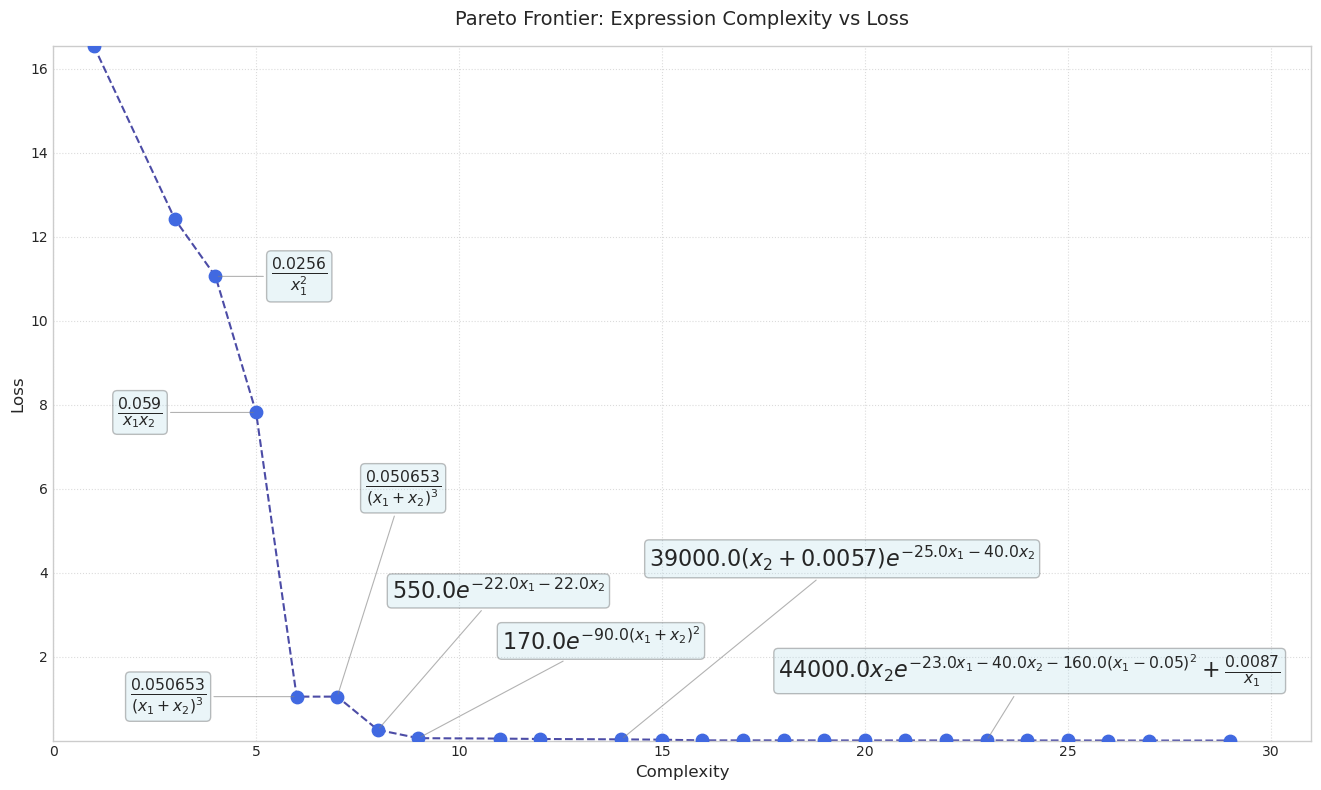

In [8]:
range_of_interest = (1, 48)
indices_of_interest = [i for i, c in enumerate(complexity) if range_of_interest[0] <= c <= range_of_interest[1]]
complexity = [complexity[i] for i in indices_of_interest]
loss = [loss[i] for i in indices_of_interest]
raw_equations = [raw_equations[i] for i in indices_of_interest]

# 2) Sympy setup
x1, x2 = sp.symbols('x1 x2')

# 3) Custom function to round constants only (not function arguments)
def round_constants(expr, ndigits=1):
    """
    Round every bare Float in `expr` so that, when printed,
    it has exactly `ndigits` digits after the decimal point
    in scientific notation (i.e. nd+1 significant figures).
    """
    def _is_leaf_float(e):
        return e.is_Float and not e.args

    def _round_sci(e):
        f = float(e)
        # format with `ndigits` places after the decimal in the mantissa:
        sci_str = f"{f:.{ndigits}e}"
        return sp.Float(sci_str)

    return expr.replace(_is_leaf_float, _round_sci)

# 4) Function to convert pow2 to squared form without evaluation
def convert_pow2(expr):
    # Find all pow2 calls
    if expr.func.__name__ == 'pow2':
        return sp.Pow(convert_pow2(expr.args[0]), 2, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow2(arg) for arg in expr.args]) if expr.args else expr

def convert_pow3(expr):
    # Find all pow3 calls
    if expr.func.__name__ == 'pow3':
        return sp.Pow(convert_pow3(expr.args[0]), 3, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow3(arg) for arg in expr.args]) if expr.args else expr

def convert_pow4(expr):
    # Find all pow4 calls
    if expr.func.__name__ == 'pow4':
        return sp.Pow(convert_pow4(expr.args[0]), 4, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow4(arg) for arg in expr.args]) if expr.args else expr

def convert_pow5(expr):
    # Find all pow5 calls
    if expr.func.__name__ == 'pow5':
        return sp.Pow(convert_pow5(expr.args[0]), 5, evaluate=False)
    # Recurse through expression
    return expr.func(*[convert_pow5(arg) for arg in expr.args]) if expr.args else expr

# 4) Function to convert pow_int without evaluation
def convert_pow_int(expr):
    # Find all pow_int calls
    if expr.func.__name__ == 'pow_int':
        base, exp = expr.args
        # If exp is literally an integer, convert to a Python int
        if exp.is_integer and exp.is_number:
            exp = int(exp)
        # Otherwise leave exp symbolic
        return sp.Pow(convert_pow_int(base), convert_pow_int(exp), evaluate=False)

    # Recursively descend into all other function applications
    if expr.args:
        return expr.func(*[convert_pow_int(arg) for arg in expr.args])
    else:
        return expr
    
def replace_pow_functions_recursive(expr: sp.Expr) -> sp.Expr:
    """
    Recursively replaces custom functions like powN(x) with standard power notation x**N.
    E.g. pow3(x + pow2(y)) → (x + y**2)**3
    """
    # First, apply recursively to all arguments (bottom-up),
    # so that nested pow-functions inside arguments get replaced too.
    expr = expr.xreplace({})  # no-op; just ensures expr is a Basic (not strictly needed)

    # Define replacement function
    def _repl(f):
        # check it's a function call
        if not isinstance(f, sp.Function):
            return f

        name = f.func.__name__
        if not name.startswith("pow"):
            return f

        # parse N from “powN”
        try:
            N = int(name[len("pow"):])
        except ValueError:
            return f

        if len(f.args) != 1:
            # unexpected arity, leave unchanged
            return f

        base = f.args[0]
        # Recursively transform the base
        new_base = replace_pow_functions_recursive(base)
        return new_base ** N

    # Use replace with map=False (so it returns an Expr)
    new_expr = expr.replace(
        lambda x: isinstance(x, sp.Function) and x.func.__name__.startswith("pow"),
        _repl,
        map=False
    )
    return new_expr

# 5) Build MathText labels
latex_labels = []
exprs_final = []
for id, s in enumerate(raw_equations):
    try:
        # Pre-process pow2 -> custom function
        s_processed = s.replace('pow2', 'pow2_func')
        s_processed = s.replace('pow3', 'pow3_func')
        s_processed = s.replace('pow4', 'pow4_func')
        s_processed = s.replace('pow5', 'pow5_func')
        s_processed = s_processed.replace('pow_int', 'pow_int_func')
        
        # Define custom functions
        locals_dict = {
            'x1': x1,
            'x2': x2,
            'pow2_func': sp.Function('pow2'),
            'pow3_func': sp.Function('pow3'),
            'pow4_func': sp.Function('pow4'),
            'pow5_func': sp.Function('pow5'),
            'pow_int_func': sp.Function('pow_int'),
            'asin': sp.asin,
            'atan': sp.atan,
            'tan': sp.tan,
            'exp': sp.exp,
        }
        
        # Parse while preserving structure
        expr = parse_expr(s_processed, evaluate=False, local_dict=locals_dict)
        
        # Convert pow2_func to squared form
        expr_converted_pow2 = convert_pow2(expr)
        expr_converted_pow3 = convert_pow3(expr)
        expr_converted_pow4 = convert_pow4(expr)
        expr_converted_pow5 = convert_pow5(expr)
        expr_converted = convert_pow_int(expr_converted_pow5)
        
        # Round constants (only standalone floats)
        expr_converted_int1 = round_constants(expr_converted)
        expr_converted_int2 = round_constants(expr_converted_int1)
        expr_final = round_constants(expr_converted_int2)
        # expr_final = expr_final.simplify()
        # expr_final = expr_final.expand()
        exprs_final.append(expr_final)

        # Get MathText-friendly LaTeX
        mt = replace_pow_functions_recursive(expr_final)
        mt = sp.latex(mt)
        latex_labels.append(f"${mt}$")
        
        # Replace 'exp' with 'np.exp'
        modified_expression = s.replace('exp', 'np.exp')
    
        # Replace 'log' with 'np.log'
        modified_expression = modified_expression.replace('log', 'np.log')
        # Debug print
        print(f"Original at complexity {complexity[id]}: {s}")
        print(f"function_ready: {modified_expression}")
        print(f"Processed: {expr_final}")
        print(f"LaTeX: {mt}\n")
    except Exception as e:
        print(f"Error processing expression: {s}\n{e}")
        latex_labels.append(f"Error: {s}")

# 6) Manual offsets for clarity
offsets = [
    (0, 0), (0, 0), (40, 0), (-100, 0), (-120, 0),
    (20, 150), (10,100), (60, 70), (0, 0), (0, 0),
    (20, 130), (0, 0), (0, 0), (0, 0), (0, 0),
    (0, 0), (0, 0), (0, 0), (0, 0), (-150, 50)
]

# 7) Plot
fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(complexity, loss, s=80, zorder=3, color='royalblue')
ax.plot(complexity, loss, linestyle='--', alpha=0.7, zorder=2, color='navy')

# Set axis limits
ax.set_xlim(min(complexity) - 1, max(complexity) + 2)
ax.set_ylim(min(loss) - 0.0005, max(loss))
fig.subplots_adjust(right=0.75)


skip_indices = []
keep_indices = [3-1, 4-1, 5-1, 6-1, 7-1, 8-1, 11-1, 20-1]
# Annotate with MathText labels
for i, (x, y, lbl, (dx, dy)) in enumerate(zip(complexity, loss, latex_labels, offsets)):
    if i in skip_indices or (i not in keep_indices):
        continue
    ax.annotate(
        lbl,
        xy=(x, y),
        xytext=(dx, dy),
        textcoords='offset points',
        ha='left',
        va='center',
        fontsize=16,
        bbox=dict(boxstyle='round,pad=0.2', alpha=0.25, fc='lightblue'),
        arrowprops=dict(arrowstyle='-', lw=0.8, alpha=0.6, color='gray')
    )

ax.set_title("Pareto Frontier: Expression Complexity vs Loss", fontsize=14, pad=15)
ax.set_xlabel("Complexity", fontsize=12)
ax.set_ylabel("Loss", fontsize=12)
ax.grid(True, linestyle=':', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

In [9]:
# --- after your existing code that builds exprs_final ---

# 1) Simplify each expression
simplified_exprs = [sp.simplify(expr) for expr in exprs_final]
rounded_simplified_exprs = [round_constants(expr) for expr in simplified_exprs]

# 2) Print them in LaTeX form
for i, expr in enumerate(exprs_final, 1):
    latex_str = sp.latex(expr)
    print(f"Expr {i} original: ${latex_str}$")


print("\n--- Simplified Expressions ---\n")
# 2) Print them in LaTeX form
for i, expr in enumerate(rounded_simplified_exprs, 1):
    latex_str = sp.latex(expr)
    print(f"Expr {i}, complexity {complexity[i-1]} simplified: ${latex_str}$")

Expr 1 original: $0.24$
Expr 2 original: $\frac{0.67}{x_{1}}$
Expr 3 original: $\operatorname{pow}_{2}{\left(\frac{0.16}{x_{1}} \right)}$
Expr 4 original: $\frac{0.059}{x_{1} x_{2}}$
Expr 5 original: $\operatorname{pow}_{3}{\left(\frac{0.37}{x_{1} + x_{2}} \right)}$
Expr 6 original: $\operatorname{pow}_{3}{\left(\frac{0.37}{x_{1} + x_{2}} \right)}$
Expr 7 original: $550.0 e^{- 22.0 x_{1} - 22.0 x_{2}}$
Expr 8 original: $170.0 e^{- 90.0 \operatorname{pow}_{2}{\left(x_{1} + x_{2} \right)}}$
Expr 9 original: $180.0 e^{x_{2} - 98.0 \operatorname{pow}_{2}{\left(x_{1} + x_{2} \right)}}$
Expr 10 original: $58000.0 x_{2} e^{- 27.0 x_{1} - 44.0 x_{2}}$
Expr 11 original: $39000.0 \left(x_{2} + 0.0057\right) e^{- 25.0 x_{1} - 40.0 x_{2}}$
Expr 12 original: $48000.0 x_{2} e^{- 21.0 x_{1} - 43.0 x_{2} - 43.0 \operatorname{pow}_{2}{\left(x_{1} \right)}}$
Expr 13 original: $23000.0 x_{2} e^{- 52.0 x_{2} \operatorname{pow}_{2}{\left(-0.86 \right)} - 52.0 \operatorname{pow}_{2}{\left(2 x_{1} \right)}}$

In [10]:
# In a Jupyter notebook cell

# 0) Enable pretty printing with LaTeX
from sympy import init_printing, simplify
from IPython.display import display

init_printing(use_latex='mathjax')  # now Sympy objects show up as LaTeX

# 1) Simplify every expression in your list
simplified_exprs = [simplify(expr) for expr in exprs_final]
rounded_simplified_exprs = [round_constants(expr) for expr in simplified_exprs]
rounded_simplified_exprs = [expr.subs({x1: sp.Symbol('m_{jj}'), x2: sp.Symbol('HT')}) for expr in rounded_simplified_exprs]

# 2) Display each one inline
for i, expr in enumerate(rounded_simplified_exprs, 1):
    display(expr)         # pretty-prints the Sympy object
    # If you want an explicit LaTeX string instead, you can do:
    # from sympy import latex
    # display(Latex(f"${latex(expr)}$"))

0.240000000000000

 0.67 
──────
m_{jj}

    ⎛ 0.16 ⎞
pow₂⎜──────⎟
    ⎝m_{jj}⎠

  0.059  
─────────
HT⋅m_{jj}

    ⎛   0.37    ⎞
pow₃⎜───────────⎟
    ⎝HT + m_{jj}⎠

    ⎛   0.37    ⎞
pow₃⎜───────────⎟
    ⎝HT + m_{jj}⎠

       -22.0⋅HT - 22.0⋅m_{jj}
550.0⋅ℯ                      

       -90.0⋅pow₂(HT + m_{jj})
170.0⋅ℯ                       

       HT - 98.0⋅pow₂(HT + m_{jj})
180.0⋅ℯ                           

            -44.0⋅HT - 27.0⋅m_{jj}
58000.0⋅HT⋅ℯ                      

                      -40.0⋅HT - 25.0⋅m_{jj}
(39000.0⋅HT + 220.0)⋅ℯ                      

            -43.0⋅HT - 21.0⋅m_{jj} - 43.0⋅pow₂(m_{jj})
48000.0⋅HT⋅ℯ                                          

            -52.0⋅HT⋅pow₂(-0.86) - 52.0⋅pow₂(2⋅m_{jj})
23000.0⋅HT⋅ℯ                                          

            -52.0⋅HT⋅pow₃(pow₂(0.95)) - 52.0⋅pow₂(2⋅m_{jj})
23000.0⋅HT⋅ℯ                                               

            -52.0⋅HT⋅pow₂(-0.86) - 52.0⋅pow₂(2⋅m_{jj})         
23000.0⋅HT⋅ℯ                                           + 0.0066

            -40.0⋅HT - 23.0⋅m_{jj} - 40.0⋅pow₂(2⋅m_{jj} - 0.11)
44000.0⋅HT⋅ℯ                                                   

            -40.0⋅HT - 23.0⋅m_{jj} - 40.0⋅pow₂(m_{jj} + log(m_{jj} + 0.9))
44000.0⋅HT⋅ℯ                                                              

            -23.0⋅m_{jj} - 23.0⋅(HT + pow₂(m_{jj} + log(m_{jj} + 0.9)))⋅pow₂(1 ↪
44000.0⋅HT⋅ℯ                                                                   ↪

↪ .3)
↪    

            -40.0⋅HT - 23.0⋅m_{jj} - 40.0⋅pow₂(m_{jj} + log(m_{jj} + 0.9))     ↪
44000.0⋅HT⋅ℯ                                                               + 0 ↪

↪      
↪ .0065

            -40.0⋅HT - 23.0⋅m_{jj} - 40.0⋅pow₂(2⋅m_{jj} - 0.1)   0.0087
44000.0⋅HT⋅ℯ                                                   + ──────
                                                                 m_{jj}

            -40.0⋅HT - 23.0⋅m_{jj} - 40.0⋅pow₂(2⋅m_{jj} - 0.1)   pow₃(0.23)
44000.0⋅HT⋅ℯ                                                   + ──────────
                                                                   m_{jj}  

                                    -40.0⋅HT - 23.0⋅m_{jj} - 40.0⋅pow₂(2⋅m_{jj ↪
44000.0⋅(HT + pow₃(pow₂(-3.3⋅HT)))⋅ℯ                                           ↪

↪ } - 0.1)
↪         

⎛                       pow₃(log(HT))⎞  -40.0⋅HT - 23.0⋅m_{jj} - 40.0⋅pow₂(2⋅m ↪
⎝44000.0⋅HT + 570000.0⋅ℯ             ⎠⋅ℯ                                       ↪

↪ _{jj} - 0.1)
↪             

                                            -40.0⋅HT - 23.0⋅m_{jj} - 40.0⋅pow₂ ↪
44000.0⋅(HT + pow₂(m_{jj}⋅pow₃(-10.0⋅HT)))⋅ℯ                                   ↪

↪ (2⋅m_{jj} - 0.1)
↪                 

                                                   -40.0⋅HT - 23.0⋅m_{jj} - 40 ↪
45000.0⋅(HT + pow₃(HT⋅pow₂(6.9⋅HT + 6.9⋅m_{jj})))⋅ℯ                            ↪

↪ .0⋅pow₂(2⋅m_{jj} - 0.1)
↪                        